In [1]:
#pip install pandas-profiling

In [2]:
import pandas as pd;
import numpy as np;
from pandas import DataFrame,Series;
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

#for predictive models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression


import warnings;
warnings.filterwarnings("ignore");

In [3]:
heart_disease = pd.read_csv("/Users/twinklerinamdar/Documents/NEU/Quarter 4/Healthcare and Pharma/Group Projet/heart.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_disease.shape

(303, 14)

In [6]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#!pip install bubbly

In [8]:
#!pip install pandas-profiling

In [9]:
disease_profile = pandas_profiling.ProfileReport(heart_disease)
disease_profile

In [10]:
figure = bubbleplot(dataset = heart_disease, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

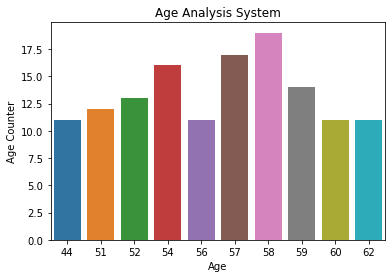

In [11]:
sns.barplot(x=heart_disease.age.value_counts()[:10].index,y=heart_disease.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

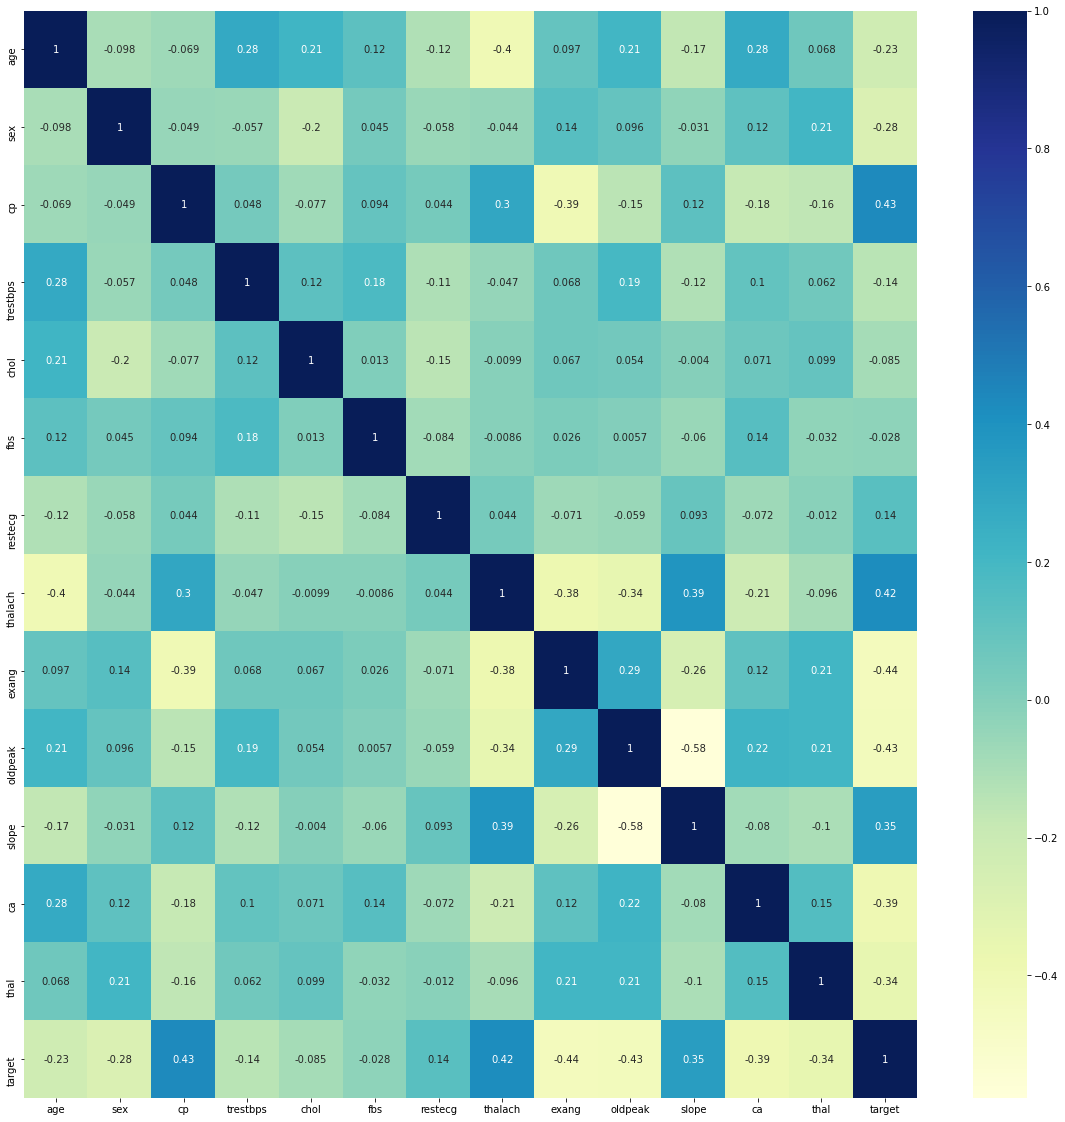

In [12]:
corrmat = heart_disease.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(heart_disease[top_corr_features].corr(), annot=True, cmap='YlGnBu')

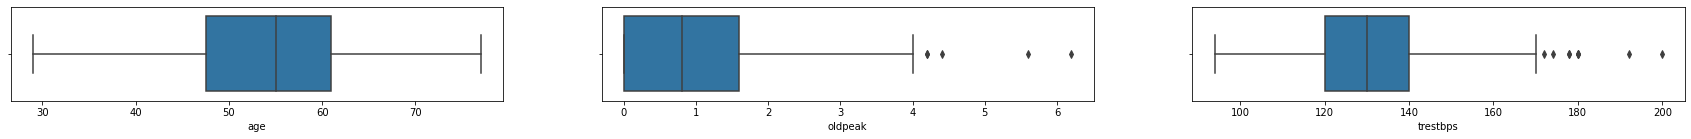

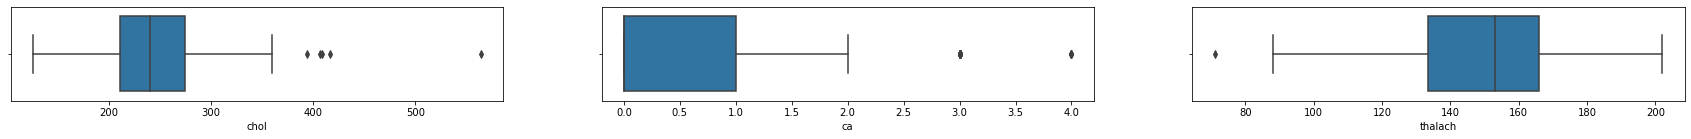

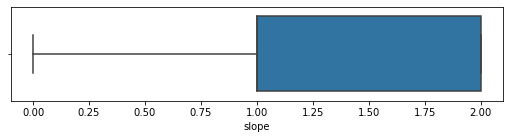

In [13]:
#checking for outliers
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["age"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["oldpeak"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["trestbps"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["chol"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["ca"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["thalach"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["slope"])

In [14]:
q1 = heart_disease['chol'].quantile(0.05)
q4 = heart_disease['chol'].quantile(0.95)
heart_disease = heart_disease[(heart_disease['chol']>=q1) & (heart_disease['chol']<=q4)]
heart_disease.shape

(273, 14)

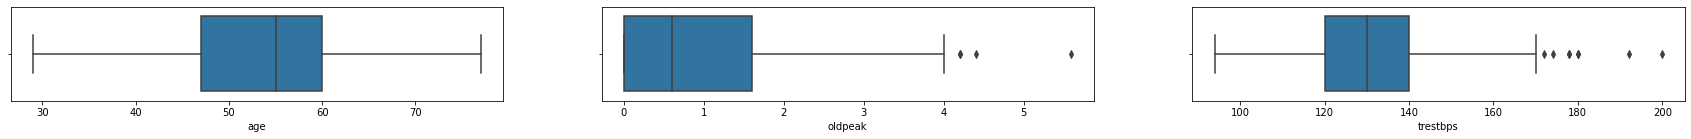

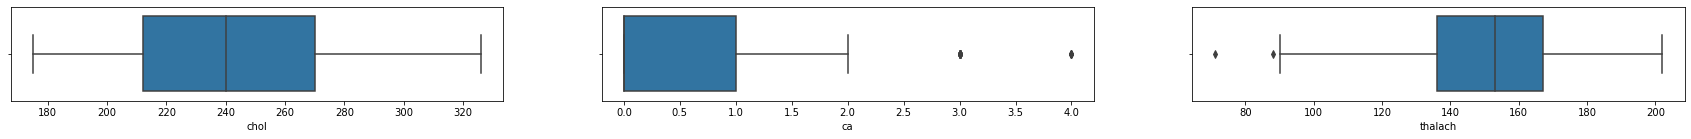

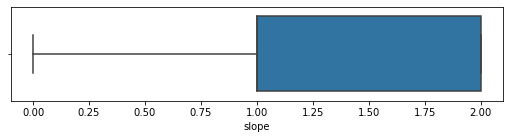

In [15]:
#checking for outliers
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["age"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["oldpeak"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["trestbps"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["chol"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["ca"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["thalach"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,2)
sns.boxplot(heart_disease["slope"])

In [16]:
q1 = heart_disease['oldpeak'].quantile(0.05)
q4 = heart_disease['oldpeak'].quantile(0.95)
heart_disease = heart_disease[(heart_disease['oldpeak']>=q1) & (heart_disease['oldpeak']<=q4)]
heart_disease.shape

(260, 14)

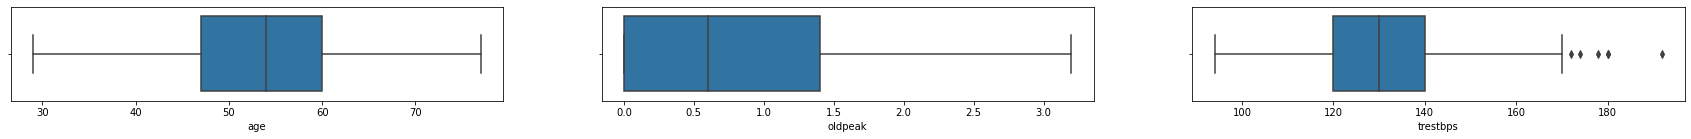

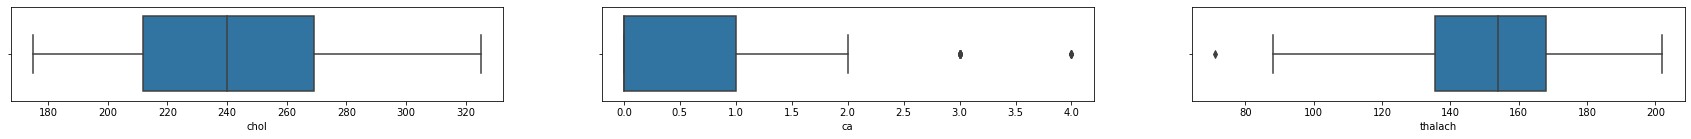

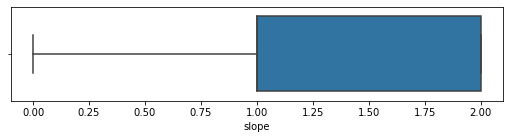

In [17]:
#checking for outliers
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["age"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["oldpeak"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["trestbps"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["chol"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["ca"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["thalach"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,2)
sns.boxplot(heart_disease["slope"])

q1 = heart_disease['ca'].quantile(0.05)
q4 = heart_disease['ca'].quantile(0.95)
heart_disease = heart_disease[(heart_disease['ca']>=q1) & (heart_disease['ca']<=q4)]
heart_disease.shape

#checking for outliers
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["age"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["oldpeak"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["trestbps"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,1)
sns.boxplot(heart_disease["chol"])
plt.subplot(5,3,2)
sns.boxplot(heart_disease["ca"])
plt.subplot(5,3,3)
sns.boxplot(heart_disease["thalach"])

plt.figure(figsize=(30,10))
plt.subplot(5,3,2)
sns.boxplot(heart_disease["slope"])

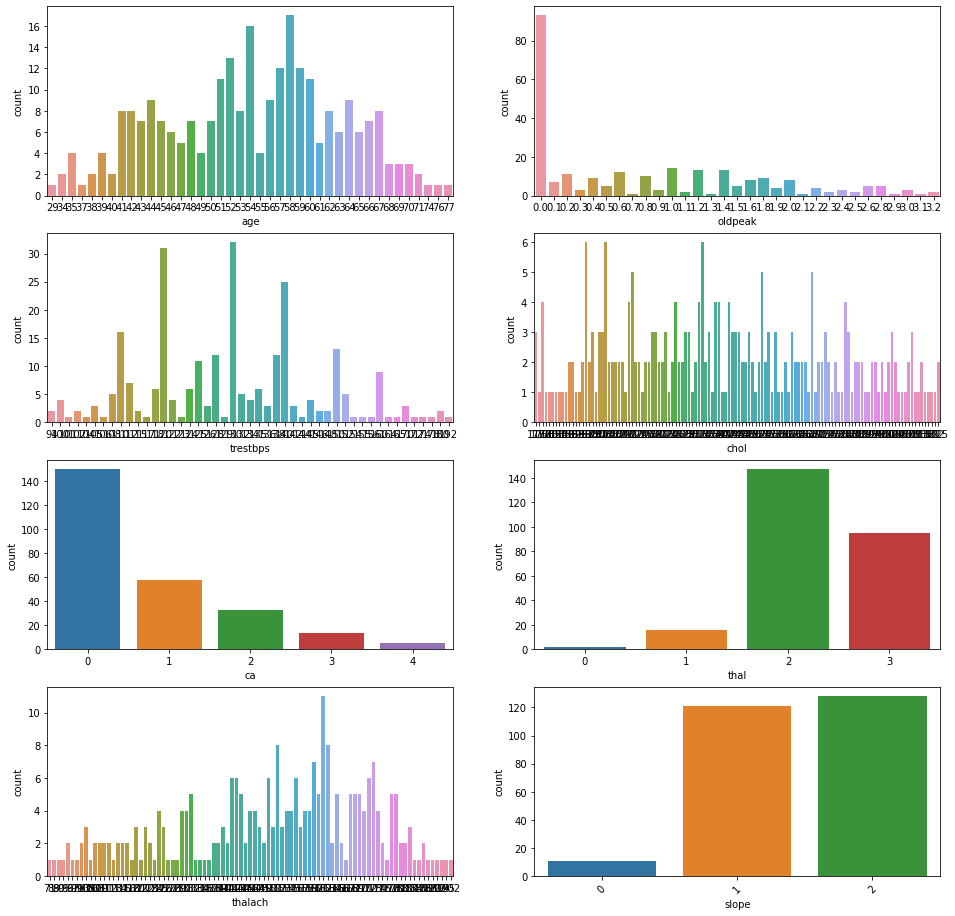

In [18]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.countplot(heart_disease.age, ax=ax[0,0])
plt.xticks(rotation=45)
sns.countplot(heart_disease.oldpeak, ax=ax[0,1]) 
plt.xticks(rotation=45)
sns.countplot(heart_disease.trestbps, ax=ax[1,0]) 
plt.xticks(rotation=45)
sns.countplot(heart_disease.chol, ax=ax[1,1]) 
plt.xticks(rotation=45)
sns.countplot(heart_disease.ca, ax=ax[2,0])
plt.xticks(rotation=45)
sns.countplot(heart_disease.thal, ax=ax[2,1])
plt.xticks(rotation=45)
sns.countplot(heart_disease.thalach, ax=ax[3,0]) 
plt.xticks(rotation=45)
sns.countplot(heart_disease.slope, ax=ax[3,1]) 
plt.xticks(rotation=45)
plt.show()

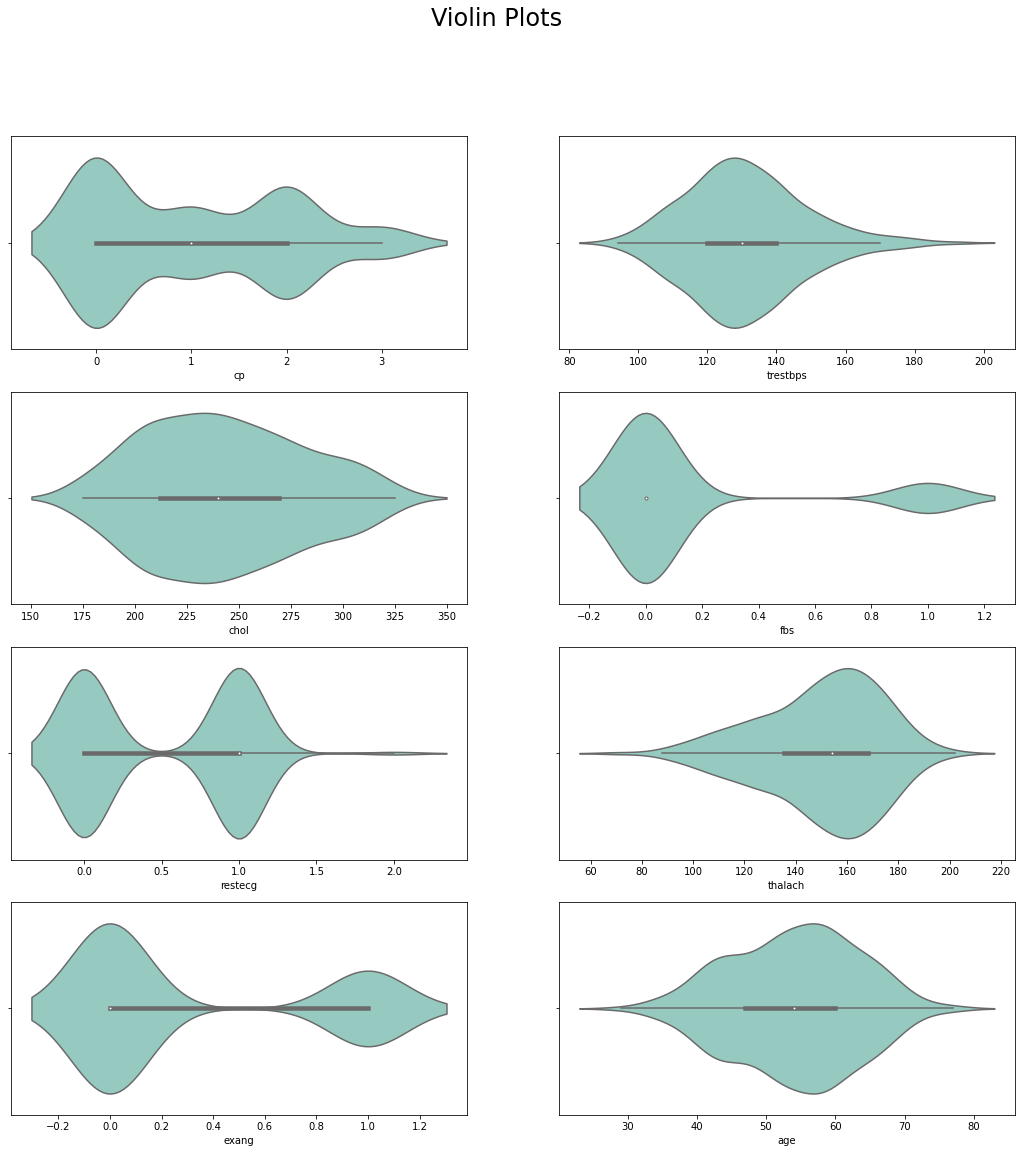

In [19]:
import seaborn as sns 
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="cp", data=heart_disease,ax=ax[0,0],palette='Set3')
sns.violinplot(x="trestbps", data=heart_disease,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='chol', data=heart_disease, ax=ax[1,0], palette='Set3')
sns.violinplot(x='fbs', data=heart_disease, ax=ax[1,1],palette='Set3')
sns.violinplot(x='restecg', data=heart_disease, ax=ax[2,0], palette='Set3')
sns.violinplot(x='thalach', data=heart_disease, ax=ax[2,1],palette='Set3')
sns.violinplot(x='exang', data=heart_disease, ax=ax[3,0],palette='Set3')
sns.violinplot(x='age', data=heart_disease, ax=ax[3,1],palette='Set3')
plt.show()

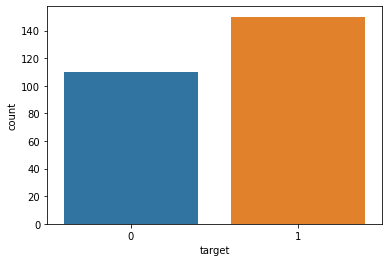

In [20]:
sns.countplot(heart_disease.target)

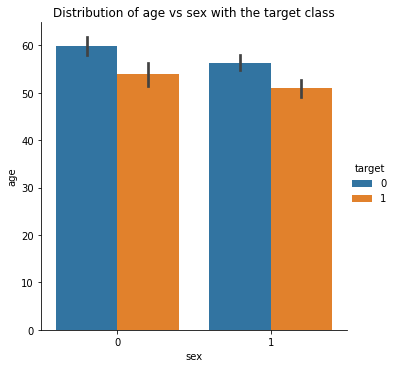

In [21]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = heart_disease, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

heart_disease['sex'] = heart_disease.sex.map({'female': 0, 'male': 1})

In [22]:
heart_disease.dtypes

age           int64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [23]:
dummy_data = pd.get_dummies(heart_disease, columns=['sex','oldpeak'], drop_first=True)
dummy_data

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,...,oldpeak_2.2,oldpeak_2.3,oldpeak_2.4,oldpeak_2.5,oldpeak_2.6,oldpeak_2.8,oldpeak_2.9,oldpeak_3.0,oldpeak_3.1,oldpeak_3.2
0,63,3,145,233,1,0,150,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,41,1,130,204,0,0,172,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,56,1,120,236,0,1,178,0,2,0,...,0,0,0,0,0,0,0,0,0,0
5,57,0,140,192,0,1,148,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,56,1,140,294,0,0,153,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,124,197,0,1,136,1,1,0,...,0,0,0,0,0,0,0,0,0,0
297,59,0,164,176,1,0,90,0,1,2,...,0,0,0,0,0,0,0,0,0,0
298,57,0,140,241,0,1,123,1,1,0,...,0,0,0,0,0,0,0,0,0,0
299,45,3,110,264,0,1,132,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
feature_variables = dummy_data.drop(['target'],axis=1)
target = dummy_data['target']

In [25]:
#Creating train and test set
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(feature_variables, target, test_size = 0.3, random_state=42)

In [32]:
# Logistic Regression Model
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_regression_predict = logistic_regression.predict(x_test)

logistic_regression_acc_score_train = accuracy_score(y_train, logistic_regression.predict(x_train))
logistic_regression_acc_score_test = accuracy_score(y_test, logistic_regression_predict)

logistic_regression_recall = metrics.recall_score(y_true=y_test, y_pred=logistic_regression_predict)

# Calculate Confusion Matrix
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
logistic_regression_conf_matrix = confusion_matrix(y_test,logistic_regression_predict)
print('Logistic Regression')
print('confusion matrix: ','\n',logistic_regression_conf_matrix)

model=LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the logistic regression is',metrics.accuracy_score(prediction,y_test))

print("Recall:",metrics.recall_score(y_true=y_test, y_pred=logistic_regression_predict))
print("Accuracy on Training set:", accuracy_score(y_train, logistic_regression.predict(x_train)))
print("Accuracy on Test set:", logistic_regression_acc_score_test)

Logistic Regression
confusion matrix:  
 [[23 10]
 [10 35]]
The accuracy of the logistic regression is 0.7435897435897436
Recall: 0.7777777777777778
Accuracy on Training set: 0.8406593406593407
Accuracy on Test set: 0.7435897435897436


In [35]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=2020)
random_forest.fit(x_train, y_train)

y_pred2 = random_forest.predict(x_test)
print('Random Forest')
random_forest_conf_matrix = confusion_matrix(y_test,y_pred2)
print('confusion matrix: ','\n',random_forest_conf_matrix)


random_forest_train = metrics.accuracy_score(y_train, random_forest.predict(x_train))*100
random_forest_test = metrics.accuracy_score(y_test, y_pred2)*100
random_forest_recall = metrics.recall_score(y_test, y_pred2)*100 
random_forest_precision = metrics.precision_score(y_test, y_pred2)*100

print("Train Accuracy:", metrics.accuracy_score(y_train, random_forest.predict(x_train))*100)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print("Recall:", metrics.recall_score(y_test, y_pred2)*100)
print("Precision:", metrics.precision_score(y_test, y_pred2)*100)

Random Forest
confusion matrix:  
 [[22 11]
 [ 6 39]]
Train Accuracy: 100.0
Test Accuracy: 78.2051282051282
Recall: 86.66666666666667
Precision: 78.0


In [36]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gradient_boost = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gradient_boost.fit(x_train,y_train)
y_pred3=gradient_boost.predict(x_test)
print('Gradient Boosting')
gradient_boosting_conf_matrix = confusion_matrix(y_test,y_pred3)
print('confusion matrix: ','\n',gradient_boosting_conf_matrix)

gb_accuracy_train = metrics.accuracy_score(y_train, gradient_boost.predict(x_train))*100
gb_accuracy_test = metrics.accuracy_score(y_test, y_pred3)*100
gb_recall = metrics.recall_score(y_test, y_pred3)*100 
gb_precision = metrics.precision_score(y_test, y_pred3)*100

print("Train Accuracy:", metrics.accuracy_score(y_train, gradient_boost.predict(x_train))*100)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print("Recall:", metrics.recall_score(y_test, y_pred3)*100)
print("Precision:", metrics.precision_score(y_test, y_pred3)*100)

Gradient Boosting
confusion matrix:  
 [[25  8]
 [ 8 37]]
Train Accuracy: 100.0
Test Accuracy: 79.48717948717949
Recall: 82.22222222222221
Precision: 82.22222222222221
